# Machine Learning Pipeline - Model Training

In this notebook, we **pick up the transformed datasets and the selected variables** that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to **ensure reproducibility between runs of the same notebook**, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib # to save the model
from sklearn.linear_model import Lasso  # Build the model!
from sklearn.metrics import mean_squared_error, r2_score  # Evaluate the model!
pd.pandas.set_option('display.max_columns', None)  # visualise al the columns

**Load the saved train and test set with the engineered variables!**

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.875000,0.375,0.5,0.75,0.571429,0.777778,0.50,0.014706,0.049180,0.2,0.285714,0.857143,0.933333,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.8,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.545455,0.5,0.8,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.444444,0.75,0.360294,0.049180,0.2,0.285714,0.571429,0.600000,0.666667,0.03375,0.666667,0.5,0.4,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.8,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.636364,0.5,0.8,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.958333,0.375,0.5,1.00,0.571429,0.888889,0.50,0.036765,0.098361,0.6,0.285714,0.428571,0.400000,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.090909,0.5,0.8,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.500000,0.375,0.5,0.75,0.571429,0.666667,0.50,0.066176,0.163934,0.2,0.285714,0.857143,0.933333,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.636364,0.5,0.8,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.416667,0.375,0.5,0.75,0.571429,0.555556,0.50,0.323529,0.737705,0.2,0.285714,0.571429,0.666667,0.666667,0.17000,0.333333,0.5,0.4,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,0.5,0.0,0.545455,0.5,0.8,0.0,0.0,0.0


**Load the target (The target is log transformed)!**

In [3]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


*Load the pre-selected features!**

In [4]:
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 
features  # display final feature set

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

**Reduce the train and test set to the selected features!..**

In [5]:
X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

**Set up the model! Set the random_state / seed!**

In [6]:
lin_model = Lasso(alpha=0.001, random_state=0)
lin_model.fit(X_train, y_train)  # train the model

Lasso(alpha=0.001, random_state=0)

**Evaluate the model: Previously, we log transformed the SalePrice. We transform them back to the original house prices values. Then we evaluate performance using the mean squared error and the root of the mean squared error and r2.**

In [7]:
pred = lin_model.predict(X_train)  # make predictions for train set
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred = lin_model.predict(X_test)  # make predictions for test set
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()
print('Average house price: ', int(np.exp(y_train).median()))

train mse: 778045499
train rmse: 27893
train r2: 0.8753897423054552

test mse: 1094169090
test rmse: 33078
test r2: 0.8407813250345448

Average house price:  163000


**Let's evaluate our predictions respect to the real sale price!**

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

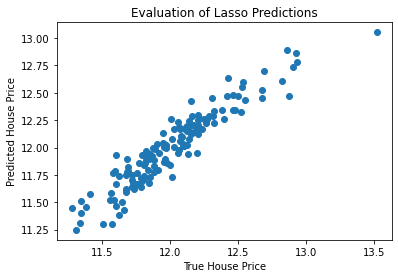

In [8]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

In [9]:
y_test.reset_index(drop=True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
141,11.884489
142,12.287653
143,11.921718
144,11.598727


**Evaluate the distribution of the errors: it should be fairly normally distributed!**

In [10]:
y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))
preds

0      12.181310
1      11.928187
2      11.669579
3      12.291806
4      11.455442
         ...    
141    11.774348
142    12.283885
143    11.950447
144    11.781989
145    12.075759
Length: 146, dtype: float64

**Evaluate the distribution of the errors: it should be fairly normally distributed!**

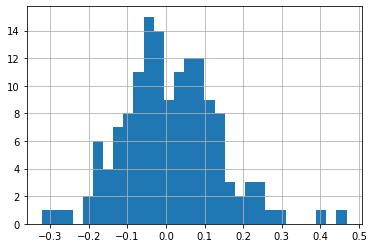

In [11]:
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

The **distribution of the errors** follows quite closely a **gaussian distribution**. That suggests that our model is doing a good job as well.

### Feature importance

**Look at the feature importance!**

Text(0.5, 1.0, 'Feature Importance')

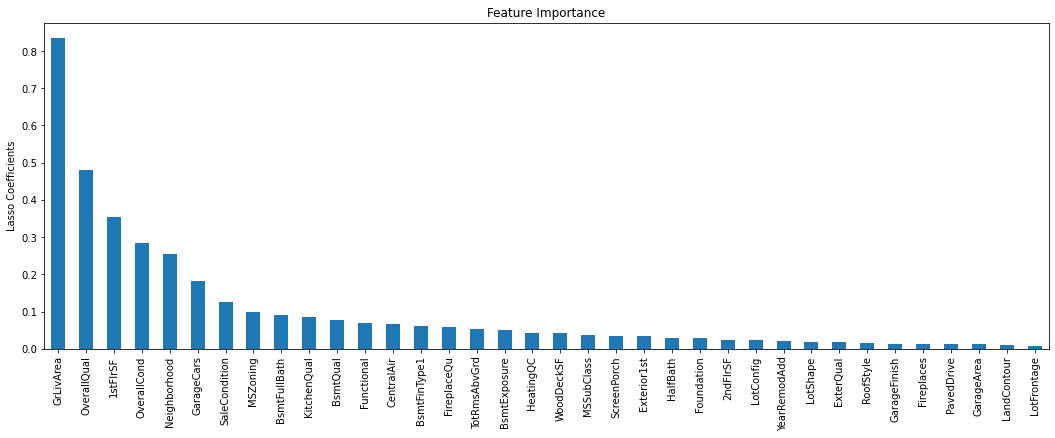

In [12]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Save the Model

**The model is OK now, save it to be able to score new data!**

In [13]:
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']